In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
cijfers = pd.read_excel('Hague_cijfers.xlsx',sheet_name = 'Meest-recent')
sec = pd.read_excel('AreaandSales.xlsx')

In [20]:
wijk = ''
for i in range (0,len(cijfers)):
    if (cijfers.loc[i,'Soort regio'] == 'Wijk'):
        wijk = cijfers.loc[i,'Naam van het gebied']
    cijfers.loc[i,'Nearest wijk'] = wijk
cijfers['Wijk no'] = cijfers['Nearest wijk'].str.split(" ",n=2,expand=True)[1]

In [21]:
sec.columns = ['Name','Total area','Number of properties sold']
sec['Wijk no'] = sec['Name'].str.split(" ",n = 1, expand = True)[0]
input_data = cijfers.merge(sec,on=['Wijk no'])

In [22]:
den = 0
prop_sold = 0
for i in range (0,len(input_data)):
    if (input_data.loc[i,'Soort regio'] == 'Wijk'):
        den = input_data.loc[i,'Total area']/input_data.loc[i,'Aantal inwoners']
        prop_sold = 1000*input_data.loc[i,'Number of properties sold']/input_data.loc[i,'Aantal inwoners']
    input_data.loc[i,'density'] = den
    input_data.loc[i,'property_sold'] = prop_sold    
#cijfers['Wijk no'] = cijfers['Nearest wijk'].str.split(" ",n=2,expand=True)[1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [23]:
input_data_fin = input_data[['Naam van het gebied','Huishoudens totaal','Aantal inwoners','65 jaar of ouder','Gemiddelde huishoudensgrootte','Niet-westers totaal','density','property_sold','40% huishoudens met laagste inkomen','20% huishoudens met hoogste inkomen']]
input_data_fin['65 jaar of ouder'] = 100*input_data_fin['65 jaar of ouder']/input_data_fin['Aantal inwoners']
input_data_fin['mid40'] = 100*(1-(input_data_fin['40% huishoudens met laagste inkomen']+input_data_fin['20% huishoudens met hoogste inkomen']))
#input_data = input_data_fin[['Naam van het gebied','Huishoudens totaal','Aantal inwoners','65 jaar of ouder','Gemiddelde huishoudensgrootte','density','property_sold','mid40']]
input_data_fin = input_data_fin.dropna()
input_data_fin = input_data_fin.reset_index(drop=True)
#weight
for i in range (0,len(input_data_fin)):
#    input_data_fin.loc[i,'lnofwaste'] =  -0.48*(62/0.14) + (0.11*62/2.9)*np.log(input_data_fin.loc[i,'65 jaar of ouder']) -(0.24*62/0.2)*np.log(input_data_fin.loc[i,'Gemiddelde huishoudensgrootte']) - (0.05*62/0.22) - (0.03*62/0.04)*np.log(0.04) + (0.03*62/1.35)*(np.log(input_data_fin.loc[i,'density'])) + (0.004*62/1.35)*(np.log(input_data_fin.loc[i,'density'])**2) + (0.002*62/3.12)*input_data_fin.loc[i,'property_sold'] + (0.24*62/2.34)*np.log(input_data_fin.loc[i,'mid40'])
    input_data_fin.loc[i,'lnofwaste_weight'] =  5.077-0.48 + (0.11)*np.log(input_data_fin.loc[i,'65 jaar of ouder']) -(0.24)*np.log(input_data_fin.loc[i,'Gemiddelde huishoudensgrootte']) - (0.05) - (0.03)*np.log(0.04) + (0.03)*(np.log(input_data_fin.loc[i,'density'])) + (0.004)*(np.log(input_data_fin.loc[i,'density'])**2) + (0.002)*input_data_fin.loc[i,'property_sold'] + (0.24)*np.log(input_data_fin.loc[i,'mid40'])
    input_data_fin.loc[i,'waste_weight'] = np.exp(input_data_fin.loc[i,'lnofwaste_weight'])
    input_data_fin.loc[i,'lnofwaste_none'] =  5.077-0 + (0.11)*np.log(input_data_fin.loc[i,'65 jaar of ouder']) -(0.24)*np.log(input_data_fin.loc[i,'Gemiddelde huishoudensgrootte']) - (0.05) - (0.03)*np.log(0.04) + (0.03)*(np.log(input_data_fin.loc[i,'density'])) + (0.004)*(np.log(input_data_fin.loc[i,'density'])**2) + (0.002)*input_data_fin.loc[i,'property_sold'] + (0.24)*np.log(input_data_fin.loc[i,'mid40'])
    input_data_fin.loc[i,'waste_none'] = np.exp(input_data_fin.loc[i,'lnofwaste_none'])
    input_data_fin.loc[i,'lnofwaste_vol'] =  5.077-0.07 + (0.11)*np.log(input_data_fin.loc[i,'65 jaar of ouder']) -(0.24)*np.log(input_data_fin.loc[i,'Gemiddelde huishoudensgrootte']) - (0.05) - (0.03)*np.log(0.04) + (0.03)*(np.log(input_data_fin.loc[i,'density'])) + (0.004)*(np.log(input_data_fin.loc[i,'density'])**2) + (0.002)*input_data_fin.loc[i,'property_sold'] + (0.24)*np.log(input_data_fin.loc[i,'mid40'])
    input_data_fin.loc[i,'waste_vol'] = np.exp(input_data_fin.loc[i,'lnofwaste_vol'])
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\s

In [24]:
input_data_fin = input_data_fin[['Naam van het gebied', 'Huishoudens totaal', 'Aantal inwoners','waste_weight','waste_none','waste_vol']]
input_data_fin.columns = ['Name','Total households','Population_2','Weight_Based_waste','No policy waste','Volume based waste']
orig = pd.read_csv('waste_generated_hague.csv')
final_waste = pd.merge(orig,input_data_fin,on=['Name'],how='inner')
final_waste.to_csv('final_policy.csv',index=False)


In [25]:
final_waste2 = pd.read_csv('final_policy.csv')
for i in range(0,len(final_waste2)):
    final_waste2.loc[i,'error'] = abs((final_waste2.loc[i,'No policy waste']-final_waste2.loc[i,'waste per capita'])/final_waste2.loc[i,'waste per capita'])
final_waste2.to_csv('final_policy2.csv',index=False)    

In [28]:
final_waste2.columns

Index(['Name', 'BUURTCODE', 'Population', 'Household_size',
       'Waste_generated_per_household', 'waste per capita', 'Total households',
       'Population_2', 'Weight_Based_waste', 'No policy waste',
       'Volume based waste', 'error'],
      dtype='object')

In [29]:
final_waste2.columns = ['Name', 'BUURTCODE', 'Population', 'Household_size',
       'Waste_generated_per_household','Original random forest','Total households','Population_2','Weight Based policy Dijkgraaf 2004','No policy Dijkgraaf 2004',
       'Volume Based policy Dijkgraaf 2004', 'error']

(array([100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 8 Text yticklabel objects>)

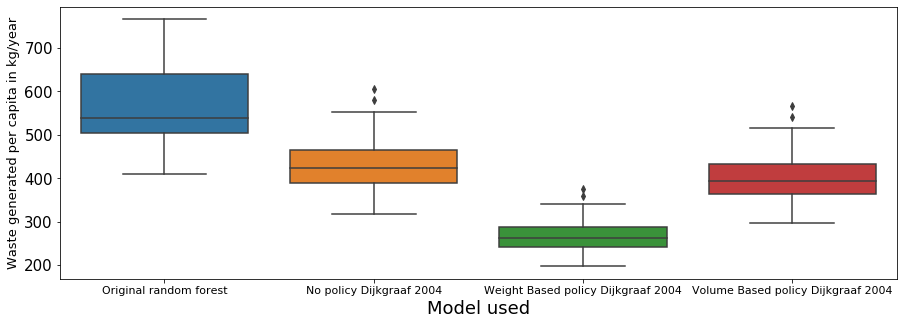

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(x="variable", y="value", data = pd.melt(final_waste2[['Original random forest','No policy Dijkgraaf 2004',
       'Weight Based policy Dijkgraaf 2004','Volume Based policy Dijkgraaf 2004']]))
plt.xlabel('Model used',fontsize=18)
plt.ylabel('Waste generated per capita in kg/year',fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=15)